# Cubic Regression with Gradient Descent

### Outline of Program
1. Find a random starting cubic function and add noise to it. This is assumed to be the starting dataset we are given.
2. Get a random starting model.
3. Find the Mean Squared Error (cost function) of model.
4. Use batch, stochastic, and mini-batch gradient descent to minimize cost function.

#### 1. Find a random starting cubic function and add noise to it. This is assumed to be the starting dataset we are given.

In [157]:
def eval_poly(coeffs, x):
    """
    Function to calculate the y-value of a cubic polynomial
    
    Args: 
        coeffs: 4-list containing the a,b,c,d coefficients 
        x: x-value to evaluate for function
    
    Returns: 
        y: the corresponding y-value for the cubic polynomial with given x
    
    """
    a = coeffs[0] * x**3
    b = coeffs[1] * x**2
    c = coeffs[2] * x**1
    d = coeffs[3]
    
    y = a + b + c + d
    return y

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Variables to change
num_xs = 500 # Number of input x
j = 200 # Noise
best_lr = 0.000001 # Learning rate (size of step) - Do not change this
batch_size = 32 # Batch size for mini-batch gradient descend
xrange = 10 # Range of x-axis
error = 0.1 # Error in percentage of initial model loss
max_iterations = 10000 # Maximum number of iterations

xs_lst = np.random.uniform(-xrange,xrange,num_xs) # Get num_xs random x integers

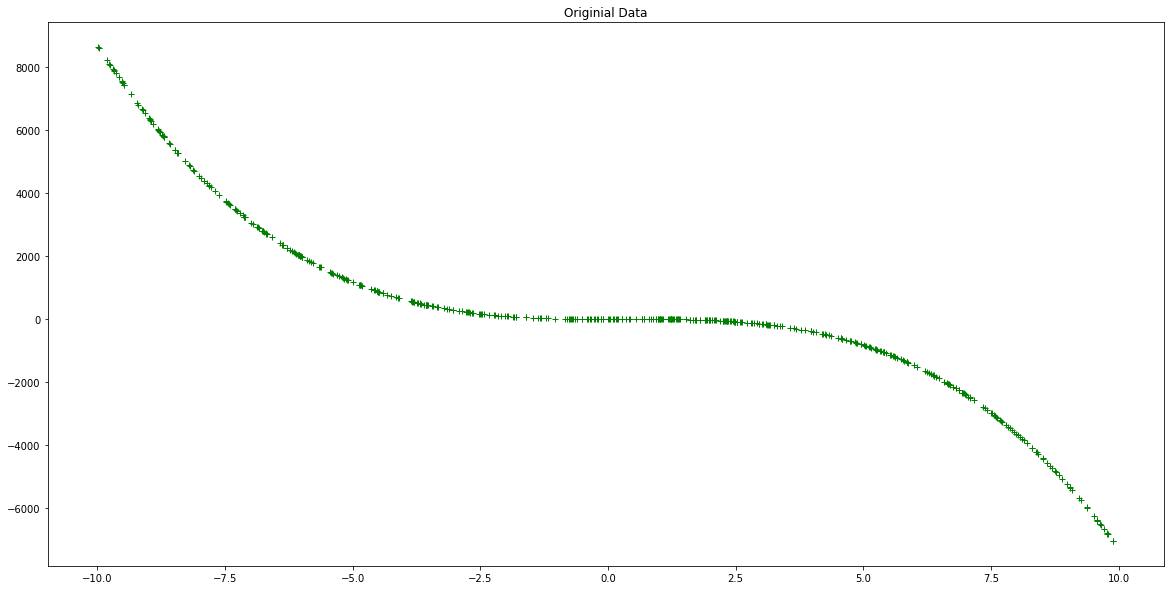

In [159]:
# Coefficientss for cubic polynomial that we want to approximate
coeffs = [random.randrange(-xrange,xrange),random.randrange(-xrange,xrange),random.randrange(-xrange,xrange),random.randrange(-xrange,xrange)] 

xs = [] # List for xs
ys = [] # List for ys

for x in xs_lst: # Iterate over each x-value
    xs.append(x) # Append x to list
    
    y = eval_poly(coeffs, x) # Evaluate y for x
    ys.append(y) # Append y to list
    
plt.figure(figsize=(20,10)) # Plot size
plt.plot(xs,ys,'g+') # Plot details
plt.title('Originial Data') # Title of plot
plt.show()

In [160]:
def eval_poly_noise(coeffs, x, j):
    """
    Function for evaluating y values of inputted x, with noise added
    for a more realistic graph
        
    args:
        coeffs: 4-list of a,b,c,d coefficients for cubic polynomial
        x: inputted x-value to be evaluated
        j: the amount of noise
        
    return:
        noise_y: y-value from evaluating cubic polynomial with noise added
        
    """
    
    a = coeffs[0] * x**3
    b = coeffs[1] * x**2
    c = coeffs[2] * x**1
    d = coeffs[3]

    y = a + b + c + d # Evaluated y value
    
    random_noise_factor = np.random.normal() * j # Getting the noise (normal)
    
    noise_y = random_noise_factor + y # Adding it to y
    
    return noise_y # Return y with the noise added

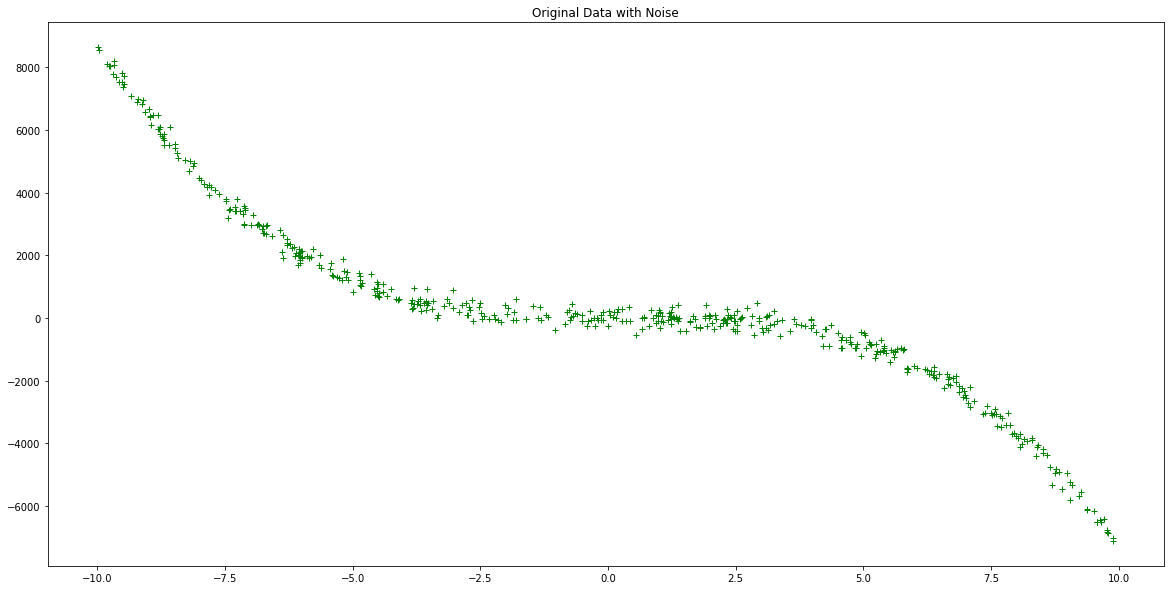

In [161]:
xs = [] # List for xs
ys = [] # List for ys

for x in xs_lst: # Iterate over each x
    xs.append(x) # Append x to list xs
    
    y = eval_poly_noise(coeffs, x, j) # Evaluate x with noise
    ys.append(y) # Append y to list ys
    
plt.figure(figsize=(20,10)) # Size of plot
plt.plot(xs,ys,'g+') # Plot details
plt.title('Original Data with Noise') # Title of plot
plt.show()

#### 2. Get a random starting model.

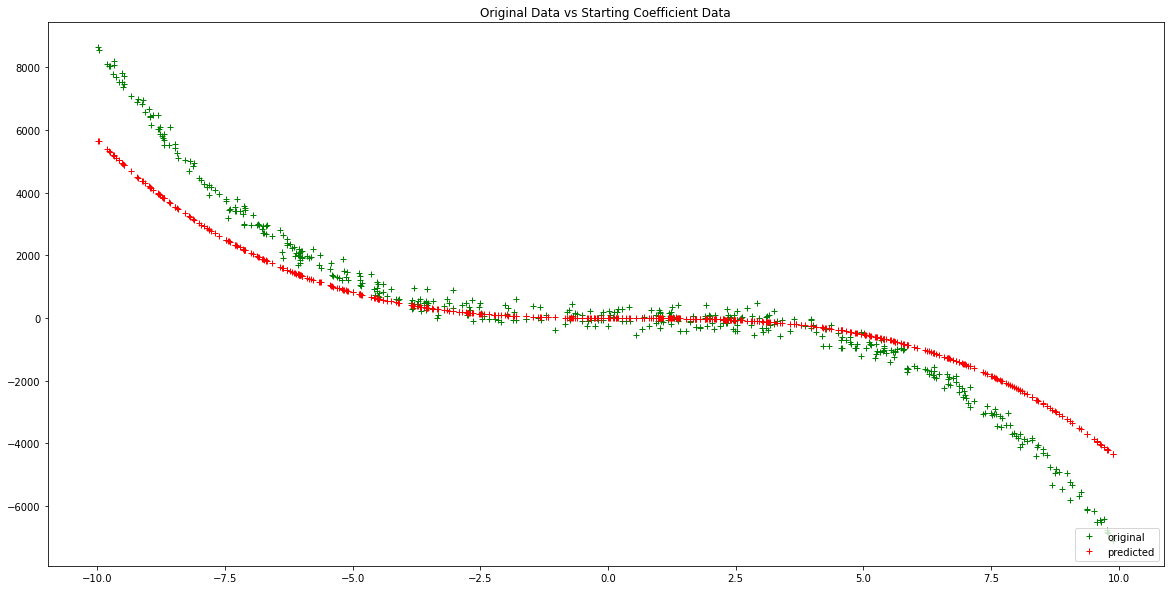

In [162]:
rand_coeffs = (random.randrange(-xrange,xrange),random.randrange(-xrange,xrange),random.randrange(-xrange,xrange),random.randrange(-xrange,xrange))
y_bar = eval_poly(rand_coeffs,xs_lst) # Tuple containing y-values with rand_coeffs as our coefficients and inputs xs

plt.figure(figsize=(20,10))
plt.plot(xs,ys,'g+', label='original')
plt.plot(xs,y_bar,'r+', label='predicted')
plt.title('Original Data vs Starting Coefficient Data')
plt.legend(loc='lower right')
plt.show()

#### 3. Find the Mean Squared Error (cost function) of model.

In [163]:
def mse(ys,y_bar):
    """
    Function for evaluating the mean squared error loss 
    
    args: 
        ys: List of actual y values
        y_bar: List of predicted y values
        
    return:
        The mean squared error value
        
    """
    
    return sum( (ys-y_bar)**2 ) / len(ys)

initial_model_loss = mse(ys,y_bar) # Variable to hold the MSE loss
print(f"Initial MSE Loss: {initial_model_loss}")

Initial MSE Loss: 1134140.6895667724


#### 4. Use batch, stochastic, and mini-batch gradient descent to minimize cost function.

In [164]:
def mbgd_for_poly(coeffs,input_xs,real_ys,lr):
    """
    Use mini-batch gradient descent to minimize mean squared error loss.
    
    args:
        coeffs: The random starting coefficients
        input_xs: List of hundred random x
        real_ys: y value with noise, evaluted from xs
        lr: learning rate
    
    return:
        new_model_coeffs: Tuple of new coefficients
        new_y_bar: New tuple of predict y values
        new_model_loss: New MSE loss
        
    """
    
    a_s = [] # List to hold sum part of gradient of MSE with respect to coefficient a
    b_s = [] # List to hold sum part of gradient of MSE with respect to coefficient b
    c_s = [] # List to hold sum part of gradient of MSE with respect to coefficient c
    d_s = [] # List to hold sum part of gradient of MSE with respect to coefficient d
    
    y_bars = eval_poly(coeffs, input_xs) # y values starting from random-starting-coefficients, then optimized coeffs
    
    x_y_ybar_list_tuple = list(zip(input_xs,real_ys,y_bars)) # Variable to hold a list of tuples (xs,ys,y_bar)
    n = len(y_bars) # Length of list xs - for averaging
    
    for _ in range(batch_size): # Iterate batch_size number of times
        
        x,y,y_bar = x_y_ybar_list_tuple[random.randrange(0,num_xs-1)] # Get elements in tuple and put into corresponding variables
        
        partial_a = x**3 * (y - y_bar) # Sum part for gradient of coefficient a
        a_s.append(partial_a)
        
        partial_b = x**2 * (y - y_bar) # Sum part for gradient of coefficient b
        b_s.append(partial_b)
        
        partial_c = x * (y - y_bar) # Sum part for gradient of coefficient c
        c_s.append(partial_c)
        
        partial_d = (y - y_bar) # Sum part for gradient of coefficient d
        d_s.append(partial_d)    

    gradient_a = (-2/n) * sum(a_s) # Gradient of MSE with respect to a
    gradient_b = (-2/n) * sum(b_s) # Gradient of MSE with respect to b
    gradient_c = (-2/n) * sum(c_s) # Gradient of MSE with respect to c
    gradient_d = (-2/n) * sum(d_s) # Gradient of MSE with respect to d
    
    
    a_new = coeffs[0] - gradient_a * lr # New coefficient a value
    b_new = coeffs[1] - gradient_b * lr # New coefficient b value
    c_new = coeffs[2] - gradient_c * lr # New coefficient c value
    d_new = coeffs[3] - gradient_d * lr # New coefficient d value
    
    new_model_coeffs = (a_new,b_new,c_new,d_new) # Tuple of new coefficients
    
    new_y_bar = eval_poly(new_model_coeffs, input_xs) # New tuple of predict y values
    
    new_model_loss = mse(ys, new_y_bar) # New MSE loss
    
    return new_model_coeffs, new_y_bar, new_model_loss

In [165]:
def sgd_for_poly(coeffs,input_xs,real_ys,lr):
    """
    Use stochastic gradient descent to minimize mean squared error loss.
    
    args:
        coeffs: The random starting coefficients
        input_xs: List of hundred random x
        real_ys: y value with noise, evaluted from xs
        lr: learning rate
    
    return:
        new_model_coeffs: Tuple of new coefficients
        new_y_bar: New tuple of predict y values
        new_model_loss: New MSE loss
        
    """
    
    y_bars = eval_poly(coeffs, input_xs) # y values starting from random-starting-coefficients
    
    x_y_ybar_list_tuple = list(zip(input_xs,real_ys,y_bars)) # Variable to hold a list of tuples
    
    n = len(y_bars) # Length of list xs
        
    x,y,y_bar = x_y_ybar_list_tuple[random.randrange(0,num_xs-1)] # Get an example

    partial_a = x**3 * (y - y_bar) # Sum part for gradient of coefficient a

    partial_b = x**2 * (y - y_bar) # Sum part for gradient of coefficient b

    partial_c = x * (y - y_bar) # Sum part for gradient of coefficient c

    partial_d = (y - y_bar) # Sum part for gradient of coefficient d   

    gradient_a = (-2/n) * partial_a # Gradient of MSE with respect to a
    gradient_b = (-2/n) * partial_b # Gradient of MSE with respect to b
    gradient_c = (-2/n) * partial_c # Gradient of MSE with respect to c
    gradient_d = (-2/n) * partial_d # Gradient of MSE with respect to d
    
    a_new = coeffs[0] - gradient_a * lr # New coefficient a value
    b_new = coeffs[1] - gradient_b * lr # New coefficient b value
    c_new = coeffs[2] - gradient_c * lr # New coefficient c value
    d_new = coeffs[3] - gradient_d * lr # New coefficient d value
    
    new_model_coeffs = (a_new,b_new,c_new,d_new) # New coefficients
    
    new_y_bar = eval_poly(new_model_coeffs, input_xs) # New list of predict y values
    
    new_model_loss = mse(ys, new_y_bar) # New MSE loss
    
    return new_model_coeffs, new_y_bar, new_model_loss

In [166]:
def bgd_for_poly(coeffs,input_xs,real_ys,lr):
    """
    Use batch gradient descent to minimize mean squared error loss.
    
    args:
        coeffs: The random starting coefficients
        input_xs: List of hundred random x
        real_ys: y value with noise, evaluted from xs
        lr: learning rate
    
    return:
        new_model_coeffs: Tuple of new coefficients
        new_y_bar: New tuple of predict y values
        new_model_loss: New MSE loss
        
    """
    
    a_s = [] # List to hold sum part of gradient of MSE with respect to coefficient a
    b_s = [] # List to hold sum part of gradient of MSE with respect to coefficient b
    c_s = [] # List to hold sum part of gradient of MSE with respect to coefficient c
    d_s = [] # List to hold sum part of gradient of MSE with respect to coefficient d
    
    y_bars = eval_poly(coeffs, input_xs) # y values starting from random-starting-coefficients
    
    for x,y,y_bar in list(zip(input_xs,real_ys,y_bars)): # Iterate over each xs, ys, y_bar
        
        x_cubed = x**3 # x cubed
        x_squared = x**2 # x squared      
        
        partial_a = x_cubed * (y - y_bar) # Sum part for gradient of coefficient a
        a_s.append(partial_a)
        
        partial_b = x_squared * (y - y_bar) # Sum part for gradient of coefficient b
        b_s.append(partial_b)
        
        partial_c = x * (y - y_bar) # Sum part for gradient of coefficient c
        c_s.append(partial_c)
        
        partial_d = (y - y_bar) # Sum part for gradient of coefficient d
        d_s.append(partial_d)
        

    n = len(y_bars) # Length of list xs
        
    gradient_a = (-2/n) * sum(a_s) # Gradient of MSE with respect to a
    gradient_b = (-2/n) * sum(b_s) # Gradient of MSE with respect to b
    gradient_c = (-2/n) * sum(c_s) # Gradient of MSE with respect to c
    gradient_d = (-2/n) * sum(d_s) # Gradient of MSE with respect to d
    
    a_new = coeffs[0] - gradient_a * lr # New coefficient a value
    b_new = coeffs[1] - gradient_b * lr # New coefficient b value
    c_new = coeffs[2] - gradient_c * lr # New coefficient c value
    d_new = coeffs[3] - gradient_d * lr # New coefficient d value
    
    new_model_coeffs = (a_new,b_new,c_new,d_new) # New coefficients
    
    new_y_bar = eval_poly(new_model_coeffs, input_xs) # New list of predict y values
    
    new_model_loss = mse(ys, new_y_bar) # New MSE loss
    
    return new_model_coeffs, new_y_bar, new_model_loss

In [167]:
def gradient_descent(error,lr,gd):
    """
    Perform selected type of gradient descent for cubic polynomial max_iteration times or until we reached our error
    
    args:
        error: percentage of final mse divided by initial mse
        lr: Learning rate
        gd: gradient descent function
        
    return:
        final_coeffs: Final coefficients
        final_y_bar: Final predicted y-values
        final_loss: Final mse loss
        losses: List containing all the losses from all iterations
        iterations: Number of iterations required to get to our desired error - capped at max_iterations
        
    """
    
    losses = [] # List to hold all MSE loss values (for graph later)
    
    iterations = 1 # Count the number of iterations needed - start with one because we need to a loss to begin while loop
    
    rand_coeffs_to_test = rand_coeffs # Variable for rand_coeffs

    loss = gd(rand_coeffs_to_test, xs_lst, ys, lr) # Variable to hold 1. tuple of coeffs, 2. list of y-values, 3. MSE loss
    rand_coeffs_to_test = loss[0] # Update coefficients for next iteration of gradient descend
    losses.append(loss[2]) # Append MSE loss to list losses
        
    
    while (loss[2]/initial_model_loss*100) >= error and iterations < max_iterations:
        
        loss = gd(rand_coeffs_to_test, xs_lst, ys, lr) # Variable to hold 1. tuple of coeffs, 2. list of y-values, 3. MSE loss
        rand_coeffs_to_test = loss[0] # Update coefficients for next iteration of gradient descend
        losses.append(loss[2]) # Append MSE loss to list losses
        
        iterations += 1
        
    # New variables to easily see what elements in loss represent
    final_coeffs = loss[0]
    final_y_bar = loss[1]
    final_loss = loss[2]
    
    return final_coeffs, final_y_bar, final_loss, losses, iterations

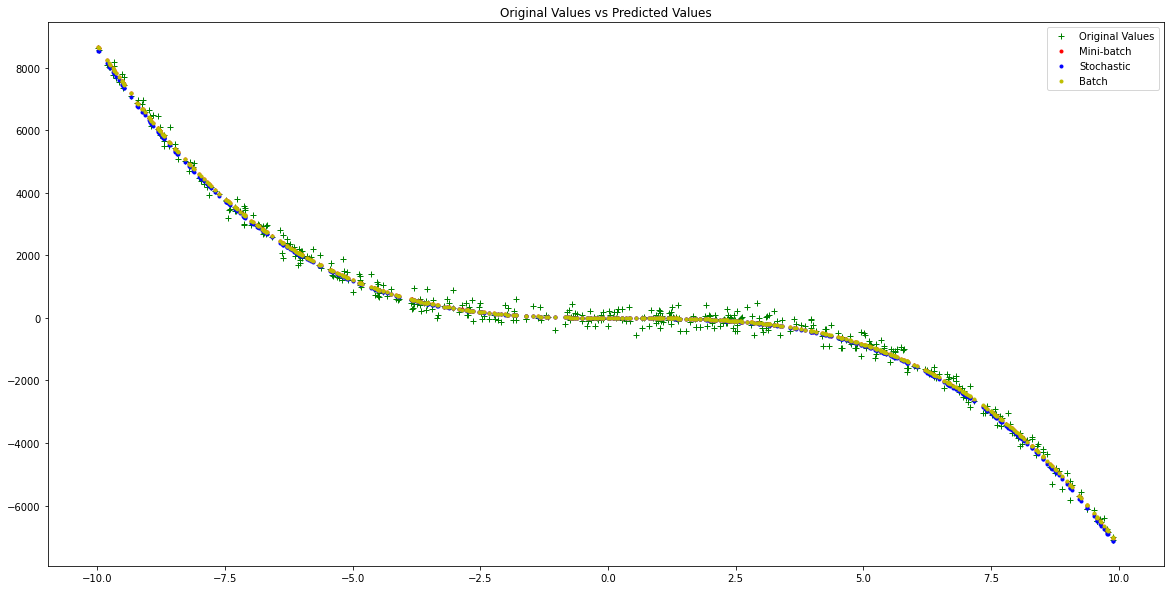

Starting Coefficients: (-5, 6, -9, -1)
Final Mini-batch Coefficients: (-7.910269889265491, 7.151974239783099, -9.002865025677243, -0.9680061866795692)
Final Stochastic Coefficients: (-7.899975689385433, 6.11138106884587, -9.04041194341352, -0.9978081391749025)
Final Batch Coefficients: (-7.90688286194558, 7.262564897393154, -8.476216892188665, -0.797082393966302)
Real Coefficients: [-8, 7, 0, 4]

Mini-batch MSE Loss: 40340.42752672288 | Percentage of Initial MSE Loss: 3.55692%
Stochastic MSE Loss: 42775.354896911595 | Percentage of Initial MSE Loss: 3.77161%
Batch MSE Loss: 40270.806913896326 | Percentage of Initial MSE Loss: 3.55078%

Mini-batch Run Time: 1.1237971782684326 sec
Stochastic Run Time: 0.8105547428131104 sec
Batch Run Time: 3.7598540782928467 sec

Mini-batch Iterations: 10000
Stochastic Iterations: 10000
Batch Iterations: 10000


In [168]:
# Optimize with each type of gradient descent and find its runtime
start = time.time()
mbgd = gradient_descent(error,best_lr,mbgd_for_poly)
end = time.time()
mbgd_time = end - start

start = time.time()
sgd = gradient_descent(error,best_lr,sgd_for_poly)
end = time.time()
sgd_time = end - start

start = time.time()
bgd = gradient_descent(error,best_lr,bgd_for_poly)
end = time.time()
bgd_time = end - start

# Plotting each gradient descent model out along with the original data
plt.figure(figsize=(20,10))
plt.plot(xs,ys,'g+', label='Original Values')
plt.plot(xs,mbgd[1],'r.', label='Mini-batch') # mini-batch gradient descend
plt.plot(xs,sgd[1],'b.', label='Stochastic') # stochastic gradient descend
plt.plot(xs,bgd[1],'y.', label='Batch') # batch gradient descend
plt.title('Original Values vs Predicted Values')
plt.legend(loc='upper right')
plt.show()

print(f"Starting Coefficients: {rand_coeffs}")
print(f"Final Mini-batch Coefficients: {mbgd[0]}")
print(f"Final Stochastic Coefficients: {sgd[0]}")
print(f"Final Batch Coefficients: {bgd[0]}")
print(f"Real Coefficients: {coeffs}")
print()

print(f"Mini-batch MSE Loss: {mbgd[2]} | Percentage of Initial MSE Loss: {round(mbgd[2]/initial_model_loss*100,5)}%")
print(f"Stochastic MSE Loss: {sgd[2]} | Percentage of Initial MSE Loss: {round(sgd[2]/initial_model_loss*100,5)}%")
print(f"Batch MSE Loss: {bgd[2]} | Percentage of Initial MSE Loss: {round(bgd[2]/initial_model_loss*100,5)}%")
print()

print(f"Mini-batch Run Time: {mbgd_time} sec")
print(f"Stochastic Run Time: {sgd_time} sec")
print(f"Batch Run Time: {bgd_time} sec") 
print()

print(f"Mini-batch Iterations: {mbgd[4]}")
print(f"Stochastic Iterations: {sgd[4]}")
print(f"Batch Iterations: {bgd[4]}")

## Loss Graph

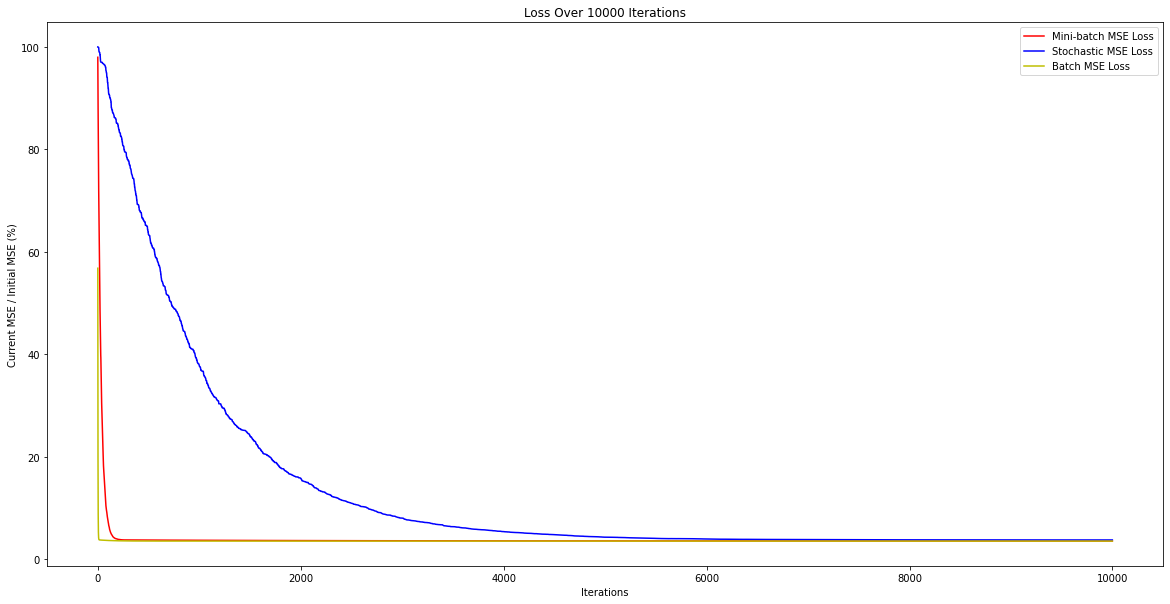

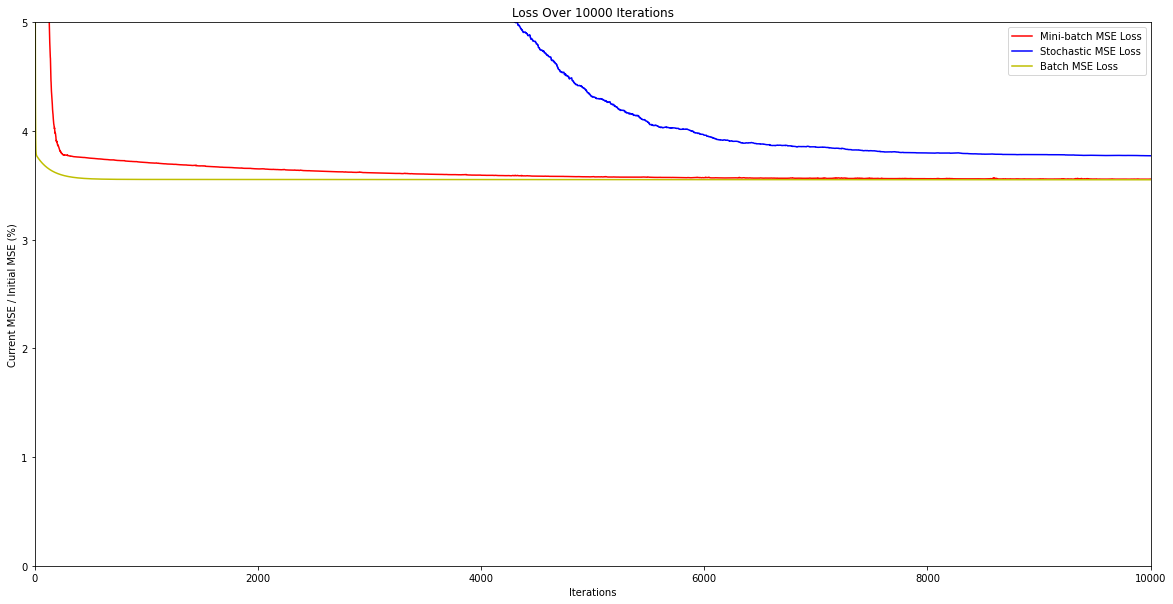

In [169]:
# Plotting loss graph
plt.figure(figsize=(20,10))
plt.plot(mbgd[3]/initial_model_loss * 100,'r-',label="Mini-batch MSE Loss")
plt.plot(sgd[3]/initial_model_loss * 100,'b-',label="Stochastic MSE Loss")
plt.plot(bgd[3]/initial_model_loss * 100,'y-',label="Batch MSE Loss")
plt.title(f'Loss Over {max(mbgd[4],bgd[4],sgd[4])} Iterations')
plt.xlabel('Iterations')
plt.ylabel('Current MSE / Initial MSE (%)')
plt.legend(loc='upper right')
plt.show()

# Show the graph zoomed in
plt.figure(figsize=(20,10))
plt.plot(mbgd[3]/initial_model_loss * 100,'r-',label="Mini-batch MSE Loss")
plt.plot(sgd[3]/initial_model_loss * 100,'b-',label="Stochastic MSE Loss")
plt.plot(bgd[3]/initial_model_loss * 100,'y-',label="Batch MSE Loss")
plt.title(f'Loss Over {max(mbgd[4],bgd[4],sgd[4])} Iterations')
plt.xlabel('Iterations')
plt.ylabel('Current MSE / Initial MSE (%)')
plt.legend(loc='upper right')
plt.axis([0, max(mbgd[4],bgd[4],sgd[4]), 0, 5])
plt.show()

#### Citation

https://towardsdatascience.com/polynomial-regression-gradient-descent-from-scratch-279db2936fe9

The article above was instrumental to my understanding and was a starting point for the project.